# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_GoogleChrome_1.csv")
df.head()

,userName,score,at,content
0,Meow lisa,1,2024-06-27 11:54:10,"Sakarag jadi jelek gak kek dulu, untuk loading..."
1,poro ro,3,2024-06-27 11:38:47,"3 stars, karena cukup berguna, 1.untuk mencari..."
2,Ronit Aziz,1,2024-06-27 11:05:59,Di ya masuk terus sedag main dan malam di ya m...
3,Edi Hutasoit,1,2024-06-27 10:53:55,Ini chrome kok erorya ya makin diupdate kok g ...
4,A Asep,4,2024-06-27 10:03:25,"brainly,facebook,lnstagram,olx,twitter Lite,yo..."


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Sakarag jadi jelek gak kek dulu, untuk loading...",Meow lisa,2024-06-27 11:54:10
1,"3 stars, karena cukup berguna, 1.untuk mencari...",poro ro,2024-06-27 11:38:47
2,Di ya masuk terus sedag main dan malam di ya m...,Ronit Aziz,2024-06-27 11:05:59
3,Ini chrome kok erorya ya makin diupdate kok g ...,Edi Hutasoit,2024-06-27 10:53:55
4,"brainly,facebook,lnstagram,olx,twitter Lite,yo...",A Asep,2024-06-27 10:03:25
...,...,...,...
1995,Aplikasi terburuk didunia chrome ini. Buat bro...,Pengguna Google,2018-12-06 06:00:58
1996,Semakin kesini saya semakin kesal karena iklan...,Pengguna Google,2018-11-16 02:25:59
1997,Dari dulu saya enggak pernah menemukan masalah...,Pengguna Google,2018-11-11 01:23:02
1998,1. Fitur pindah tujuan download ditambah ke mi...,Pengguna Google,2018-09-28 14:37:43


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   2000 non-null   object
 1   userName  2000 non-null   object
 2   at        2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,2000,2000,2000
unique,1998,1944,1998
top,Terlalu banyak iklan,Pengguna Google,2024-03-14 21:17:09
freq,2,53,3


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1998, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,sakarag jadi jelek gak kek dulu untuk loading ...,Meow lisa,2024-06-27 11:54:10
1,stars karena cukup berguna untuk mencari info...,poro ro,2024-06-27 11:38:47
2,di ya masuk terus sedag main dan malam di ya m...,Ronit Aziz,2024-06-27 11:05:59
3,ini chrome kok erorya ya makin diupdate kok g ...,Edi Hutasoit,2024-06-27 10:53:55
4,brainlyfacebooklnstagramolxtwitter liteyoutube...,A Asep,2024-06-27 10:03:25
...,...,...,...
1995,aplikasi terburuk didunia chrome ini buat brow...,Pengguna Google,2018-12-06 06:00:58
1996,semakin kesini saya semakin kesal karena iklan...,Pengguna Google,2018-11-16 02:25:59
1997,dari dulu saya enggak pernah menemukan masalah...,Pengguna Google,2018-11-11 01:23:02
1998,fitur pindah tujuan download ditambah ke micr...,Pengguna Google,2018-09-28 14:37:43


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,sakarag jadi jelek tidak seperti dulu untuk lo...,Meow lisa,2024-06-27 11:54:10
1,stars karena cukup berguna untuk mencari info...,poro ro,2024-06-27 11:38:47
2,di ya masuk terus sedag main dan malam di ya m...,Ronit Aziz,2024-06-27 11:05:59
3,ini chrome kenapa erorya ya makin diupdate ken...,Edi Hutasoit,2024-06-27 10:53:55
4,brainlyfacebooklnstagramolxtwitter liteyoutube...,A Asep,2024-06-27 10:03:25
...,...,...,...
1995,aplikasi terburuk didunia chrome ini buat brow...,Pengguna Google,2018-12-06 06:00:58
1996,semakin kesini saya semakin kesal karena iklan...,Pengguna Google,2018-11-16 02:25:59
1997,dari dulu saya engtidak pernah menemukan masal...,Pengguna Google,2018-11-11 01:23:02
1998,fitur pindah tujuan download ditambah ke micr...,Pengguna Google,2018-09-28 14:37:43


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["aku", "anda", "bagaimana", "bahwa", "banyak", "beberapa", "bisa", "dan", "dari", "dengan", "dia", "di", "ini", "itu", "kamu", "kami", "kapan", "karena", "kita", "mereka", "pada", "saja", "sangat", "saya", "sebagaimana", "sebagai", "sebelum", "sudah", "tetapi", "tidak", "untuk", "yang",
                   "saya", "kamu", "dia", "mereka", "kita", "kami", "engkau", "anda", "kalian", "ini", "itu", "di", "ke", "dari", "pada", "dengan", "untuk", "kepada", "oleh", "sampai", "hingga", "sejak", "demi", "dan", "atau", "tetapi", "bahwa", "sehingga", "karena", "meskipun", "walaupun", "namun", "si",
                   "sang", "para", "bukan", "sudah", "belum", "masih", "akan", "telah", "sedang", "bisa", "dapat", "harus"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,sakarag jadi jelek seperti dulu loading halama...,Meow lisa,2024-06-27 11:54:10
1,stars cukup berguna mencari informasi mencari...,poro ro,2024-06-27 11:38:47
2,ya masuk terus sedag main malam ya masuk terus...,Ronit Aziz,2024-06-27 11:05:59
3,chrome erorya makin diupdate g dibuka selalu k...,Edi Hutasoit,2024-06-27 10:53:55
4,brainlyfacebooklnstagramolxtwitter liteyoutube...,A Asep,2024-06-27 10:03:25
...,...,...,...
1995,aplikasi terburuk didunia chrome buat browsing...,Pengguna Google,2018-12-06 06:00:58
1996,semakin kesini semakin kesal iklan terlalau be...,Pengguna Google,2018-11-16 02:25:59
1997,dulu engtidak pernah menemukan masalah app mul...,Pengguna Google,2018-11-11 01:23:02
1998,fitur pindah tujuan download ditambah micro s...,Pengguna Google,2018-09-28 14:37:43


# **Tokenize**

In [18]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [sakarag, jadi, jelek, seperti, dulu, loading,...
1       [stars, cukup, berguna, mencari, informasi, me...
2       [ya, masuk, terus, sedag, main, malam, ya, mas...
3       [chrome, erorya, makin, diupdate, g, dibuka, s...
4       [brainlyfacebooklnstagramolxtwitter, liteyoutu...
                              ...                        
1995    [aplikasi, terburuk, didunia, chrome, buat, br...
1996    [semakin, kesini, semakin, kesal, iklan, terla...
1997    [dulu, engtidak, pernah, menemukan, masalah, a...
1998    [fitur, pindah, tujuan, download, ditambah, mi...
1999    [saya, keren, temanya, lebih, elegan, cuma, le...
Name: content, Length: 1998, dtype: object

# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GoogleChrome_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GoogleChrome_1.csv', encoding = 'latin1')
df_clean

,content
0,sekarang jadi jelek seperti dulu loading halam...
1,stars cukup guna cari informasi cari download ...
2,ya masuk terus sedag main malam ya masuk terus...
3,chrome erorya makin diupdate g buka selalu kna...
4,brainlyfacebooklnstagramolxtwitter liteyoutube...
...,...
1993,aplikasi buruk dunia chrome buat browsing load...
1994,makin kesini makin kesal iklan lalau belebihan...
1995,dulu engtidak pernah temu masalah app mulai do...
1996,fitur pindah tuju download tambah micro sd ikl...


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GoogleChrome_1.csv', encoding='latin1')

In [24]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MicrosoftEdge_1.csv')

In [28]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GoogleChrome_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...
1,1,stars cukup guna cari informasi cari download ...,stars are enough to find information to downlo...
2,2,ya masuk terus sedag main malam ya masuk terus...,"Yeah, you know, just come in and play all nigh..."
3,3,chrome erorya makin diupdate g buka selalu kna...,chrome errorya is getting updated g open always.
4,4,brainlyfacebooklnstagramolxtwitter liteyoutube...,brainly facebook innstagramolxtwitter liteyout...
...,...,...,...
1993,1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...
1994,1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...
1995,1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ..."
1996,1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GoogleChrome_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...
1,1,stars cukup guna cari informasi cari download ...,stars are enough to find information to downlo...
2,2,ya masuk terus sedag main malam ya masuk terus...,"Yeah, you know, just come in and play all nigh..."
3,3,chrome erorya makin diupdate g buka selalu kna...,chrome errorya is getting updated g open always.
4,4,brainlyfacebooklnstagramolxtwitter liteyoutube...,brainly facebook innstagramolxtwitter liteyout...
...,...,...,...
1993,1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...
1994,1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...
1995,1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ..."
1996,1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1048
Netral = 482
Negatif = 468

Total Data Seluruhnya : 1998


In [33]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...,Positif
1,1,stars cukup guna cari informasi cari download ...,stars are enough to find information to downlo...,Netral
2,2,ya masuk terus sedag main malam ya masuk terus...,"Yeah, you know, just come in and play all nigh...",Netral
3,3,chrome erorya makin diupdate g buka selalu kna...,chrome errorya is getting updated g open always.,Netral
4,4,brainlyfacebooklnstagramolxtwitter liteyoutube...,brainly facebook innstagramolxtwitter liteyout...,Netral
...,...,...,...,...
1993,1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...,Negatif
1994,1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...,Positif
1995,1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ...",Negatif
1996,1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...,Negatif


In [34]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...,Positif
1,stars cukup guna cari informasi cari download ...,stars are enough to find information to downlo...,Netral
2,ya masuk terus sedag main malam ya masuk terus...,"Yeah, you know, just come in and play all nigh...",Netral
3,chrome erorya makin diupdate g buka selalu kna...,chrome errorya is getting updated g open always.,Netral
4,brainlyfacebooklnstagramolxtwitter liteyoutube...,brainly facebook innstagramolxtwitter liteyout...,Netral
...,...,...,...
1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...,Negatif
1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...,Positif
1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ...",Negatif
1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...,Negatif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



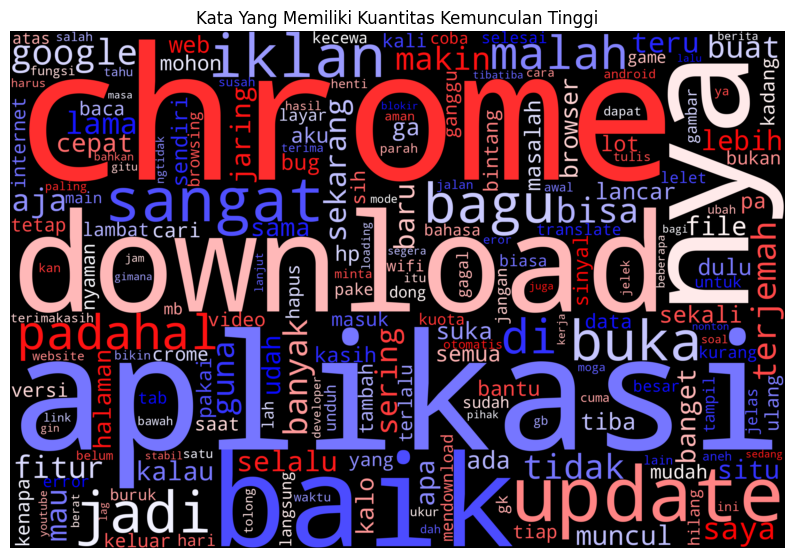

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


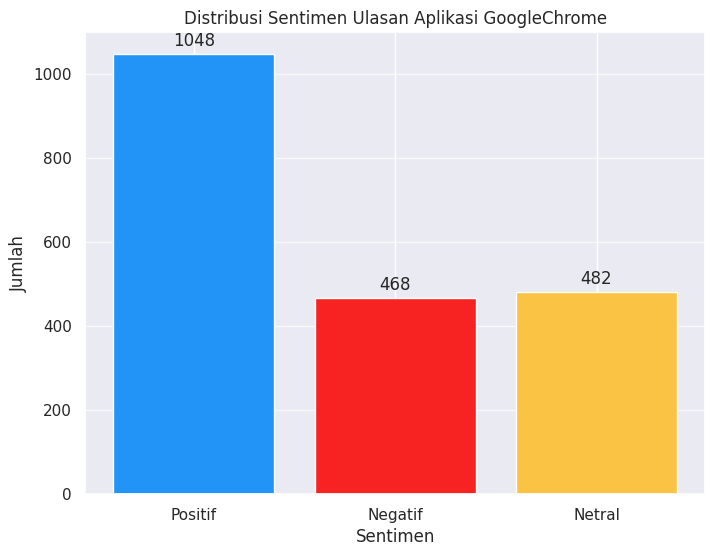

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GoogleChrome")


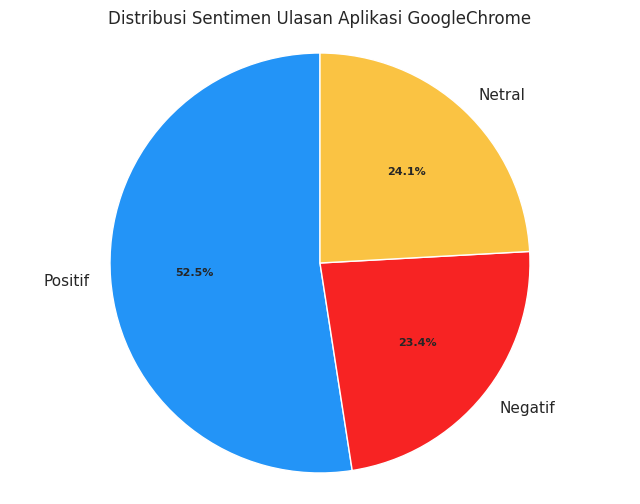

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GoogleChrome")

In [38]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...,Positif
5,cepat lot,fast lot,Positif
6,manfaat bagus guna temu aplikasi kait dgn perl...,good benefits for mount application appointmen...,Positif
7,layan nya tetap bagus terimakasih,It's still good. Thank you.,Positif
9,bagus tp telusur gambar tidak,It's good. But go through the picture. No.,Positif
...,...,...,...
1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...,Negatif
1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...,Positif
1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ...",Negatif
1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...,Negatif


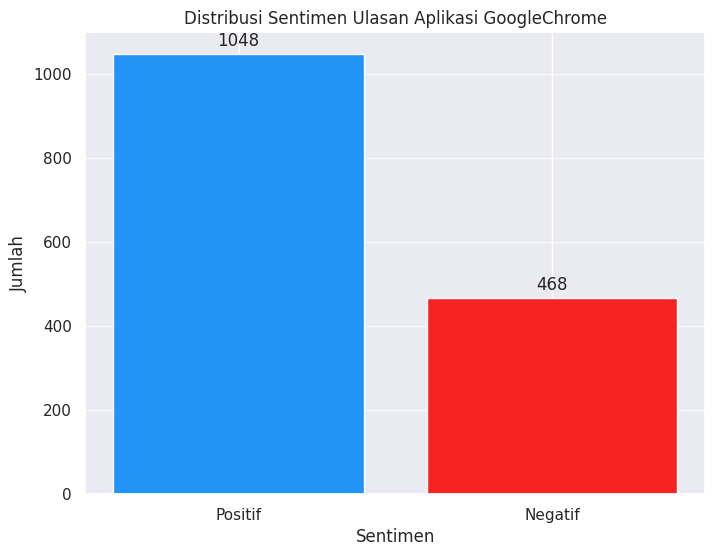

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GoogleChrome")


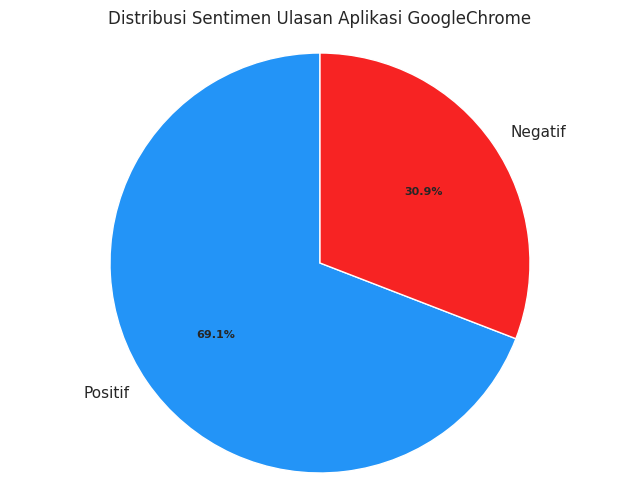

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GoogleChrome")

In [41]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,sekarang jadi jelek seperti dulu loading halam...,Now it's as ugly as it used to be loading old ...,0
5,cepat lot,fast lot,0
6,manfaat bagus guna temu aplikasi kait dgn perl...,good benefits for mount application appointmen...,0
7,layan nya tetap bagus terimakasih,It's still good. Thank you.,0
9,bagus tp telusur gambar tidak,It's good. But go through the picture. No.,0
...,...,...,...
1993,aplikasi buruk dunia chrome buat browsing load...,The world's bad apps chrome for browsing its l...,1
1994,makin kesini makin kesal iklan lalau belebihan...,Getting here gets more and more upset. Adverti...,0
1995,dulu engtidak pernah temu masalah app mulai do...,"fontcolor="" # FFFF00""in thetime fontcolor="" # ...",1
1996,fitur pindah tuju download tambah micro sd ikl...,Move feature go to download add micro sd ads w...,1


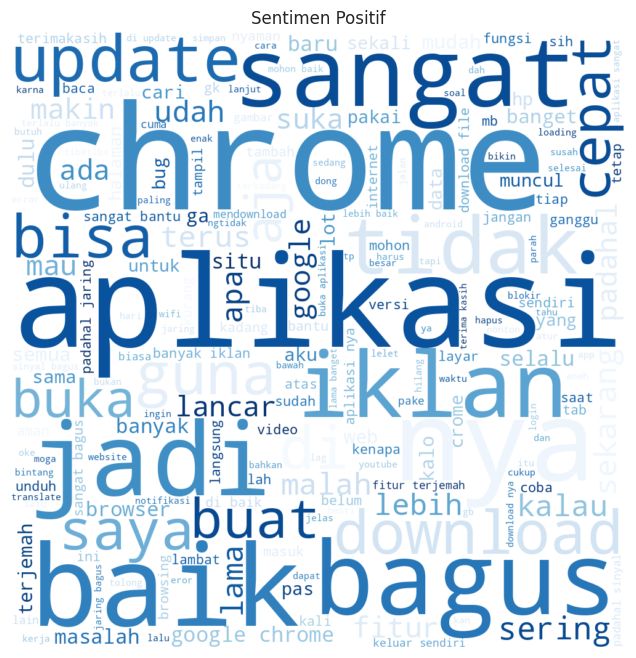

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

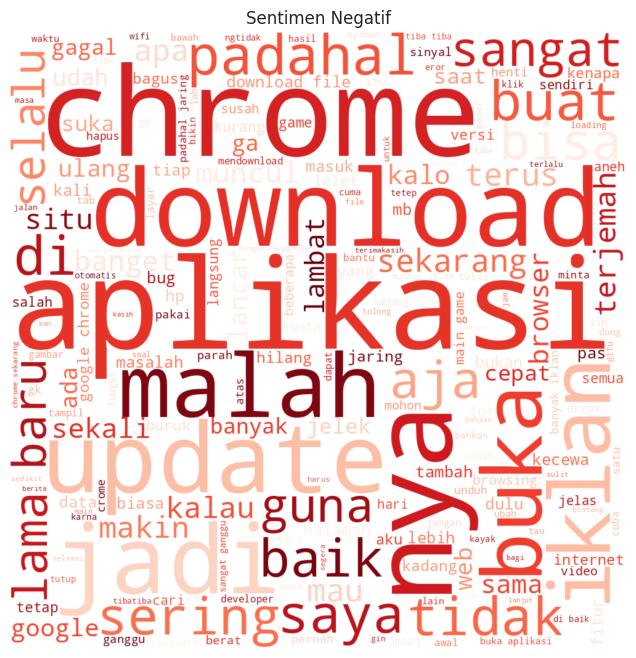

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

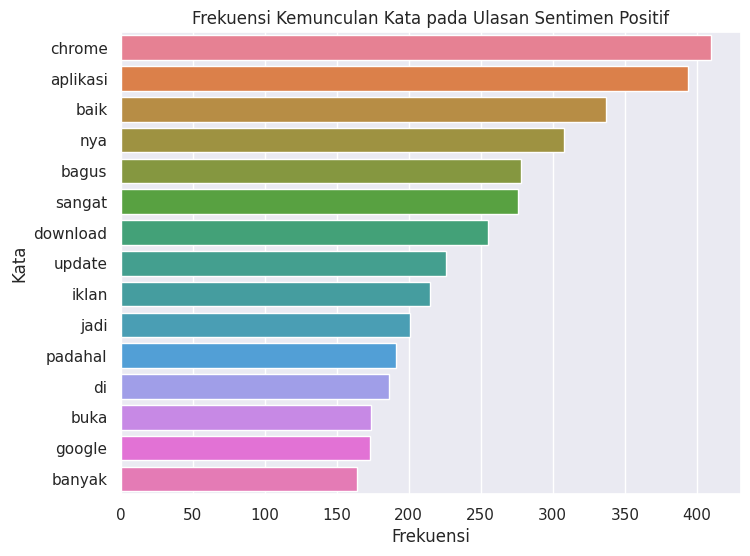

In [44]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [45]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
  chrome        410
aplikasi        394
    baik        337
     nya        308
   bagus        278
  sangat        276
download        255
  update        226
   iklan        215
    jadi        201
 padahal        191
      di        186
    buka        174
  google        173
  banyak        164


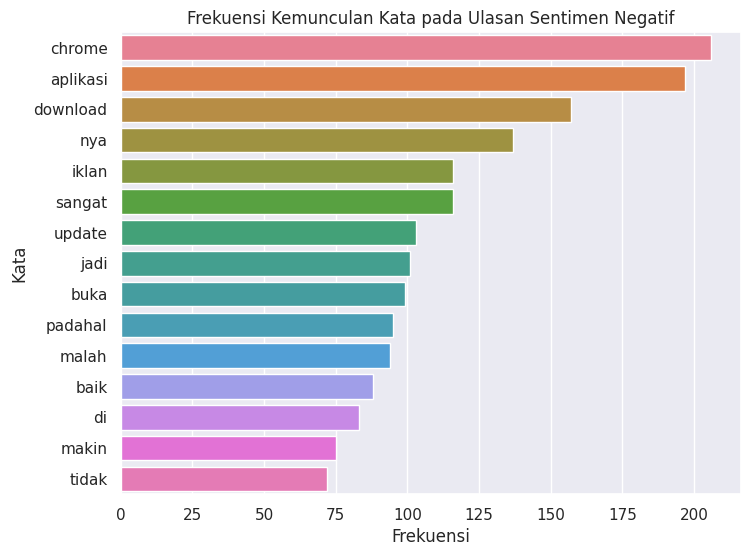

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
  chrome        206
aplikasi        197
download        157
     nya        137
   iklan        116
  sangat        116
  update        103
    jadi        101
    buka         99
 padahal         95
   malah         94
    baik         88
      di         83
   makin         75
   tidak         72


In [48]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    1048
1     468
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [49]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

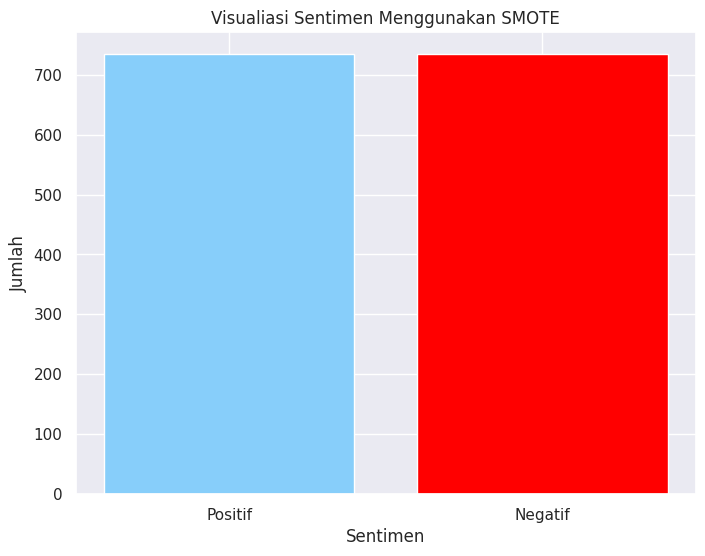

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [53]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [54]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6945054945054945
Akurasi untuk c = 0.05: 0.6989010989010989
Akurasi untuk c = 0.25: 0.7186813186813187
Akurasi untuk c = 0.5: 0.7142857142857143
Akurasi untuk c = 0.75: 0.7076923076923077
Akurasi untuk c = 1: 0.7098901098901099


In [56]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [57]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7098901098901099 


In [58]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.7099

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       314
           1       0.54      0.44      0.48       141

    accuracy                           0.71       455
   macro avg       0.65      0.64      0.64       455
weighted avg       0.70      0.71      0.70       455



In [59]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[261  53]
 [ 79  62]]

True Positives (TP) =  261

True Negatives (TN) =  62

False Positives (FP) =  53

False Negatives (FN) =  79

Accuracy =  0.7098901098901099


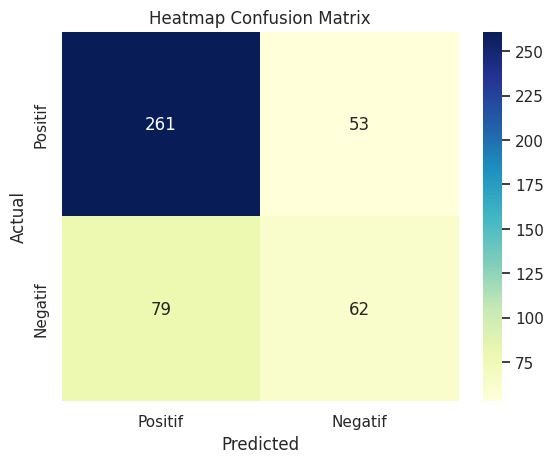

In [60]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [61]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [62]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7099


In [63]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2901


# **Testing**

In [64]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Browser paling buruk yang pernah ada, lebih bagus browser bawaan hp daripada browser chrome seperti ini, udah lemot pencarian gak sesuai sama ekspetasi, intinya bintang 1 ⭐
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 66.23%
Probabilitas: 66.2256754446799 %


In [65]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Saya sangat kecewa dengan Google Chrome ini, karena tiba tiba Tab Browser Terbuka sendiri. Sudah saya lakukan berbagai cara untuk mengatasi, dan menyelesaikan nya namun tetap saja tidak bisa😡😡😡😡😡, dengan terjadi nya ini aktivitas saya jadi sangat terganggu😠😠😠😠
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 50.85%
Probabilitas: 50.8454082980477 %
